# Introduction
___
* Add comments, markdowns, and clean the notebook!
* May be add back the polynomial steps at the end.
* Add visualizations

In [2]:
# import the libraries necessarry for cleaning and eda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white')
plt.style.use('seaborn')

pd.set_option('display.max_columns', 100)  # display max rows and columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # avoid outputing scientific notation

## Data Exploration & Cleaning
___

In [3]:
nym = pd.read_csv('nym_mlb.txt', sep = ',')  # read in the text file

In [4]:
print(nym.shape)  # check the dimensions of the 
nym.head()  # print the first 5 rows

(1620, 11)


,game#,date,h/a,opponent,w-l,rank,games_behind,d/n,attendance,cli,streak
0,1,Monday Apr 5,NaN,FLA,1-0,1,Tied,D,41245.00,1.08,+
1,2,Wednesday Apr 7,NaN,FLA,1-1,3,1.0,N,38863.00,1.14,-
2,3,Thursday Apr 8,NaN,FLA,1-2,4,1.0,N,25982.00,1.01,--
3,4,Friday Apr 9,NaN,WSN,2-2,2,1.0,N,28055.00,0.98,+
4,5,Saturday Apr 10,NaN,WSN,2-3,4,2.0,D,33044.00,1.06,-


* the `h/a` column indicates whether the game was played citifield, which is the Mets homeground, or at away ground.
* '@' value indicates that it was played at the opponents home turf.

In [5]:
nym['h/a'].value_counts(dropna=False)  # the games should be equally distributed in both classes

@      810
NaN    810
Name: h/a, dtype: int64

In [6]:
# We only wantthe games that were played at the Ny Mets home stadium
nym_home = nym[nym['h/a'] != '@'].copy()
nym_home.shape

(810, 11)

81, 162, 243, 324, 405, 486, 567, 648, 729

In [7]:
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [8]:
nym_home['date'][:81] = nym_home['date'][:81] + ' 2010'
nym_home['date'][81:162] = nym_home['date'][81:162] + ' 2011'
nym_home['date'][162:243] = nym_home['date'][162:243] + ' 2012'
nym_home['date'][243:324] = nym_home['date'][243:324] + ' 2013'
nym_home['date'][324:405] = nym_home['date'][324:405] + ' 2014'
nym_home['date'][405:486] = nym_home['date'][405:486] + ' 2015'
nym_home['date'][486:567] = nym_home['date'][486:567] + ' 2016'
nym_home['date'][567:648] = nym_home['date'][567:648] + ' 2017'
nym_home['date'][648:729] = nym_home['date'][648:729] + ' 2018'
nym_home['date'][729:] = nym_home['date'][729:] + ' 2019'

In [9]:
nym_home.head()

,game#,date,h/a,opponent,w-l,rank,games_behind,d/n,attendance,cli,streak
0,1,Monday Apr 5 2010,NaN,FLA,1-0,1,Tied,D,41245.00,1.08,+
1,2,Wednesday Apr 7 2010,NaN,FLA,1-1,3,1.0,N,38863.00,1.14,-
2,3,Thursday Apr 8 2010,NaN,FLA,1-2,4,1.0,N,25982.00,1.01,--
3,4,Friday Apr 9 2010,NaN,WSN,2-2,2,1.0,N,28055.00,0.98,+
4,5,Saturday Apr 10 2010,NaN,WSN,2-3,4,2.0,D,33044.00,1.06,-


In [10]:
nym_home.info()  # check the column types and how many null values they have

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 1619
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game#         810 non-null    int64  
 1   date          810 non-null    object 
 2   h/a           0 non-null      object 
 3   opponent      810 non-null    object 
 4   w-l           810 non-null    object 
 5   rank          810 non-null    int64  
 6   games_behind  810 non-null    object 
 7   d/n           810 non-null    object 
 8   attendance    797 non-null    float64
 9   cli           810 non-null    float64
 10  streak        810 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 75.9+ KB


* As expected, `h/a` column should have no more non-null values.
* Attendance is missing for 13 games. Let's inspect these observations.

In [11]:
nym_home.drop(columns= ['h/a','w-l'], inplace= True)

In [12]:
nym_home[nym_home['attendance'].isnull() == True]  # print the rows with null attendance

,game#,date,opponent,rank,games_behind,d/n,attendance,cli,streak
19,20,Tuesday Apr 27 (1) 2010,LAD,1,up 0.5,D,nan,1.02,+++++
156,157,Wednesday Sep 29 (1) 2010,MIL,3,17.5,D,nan,0.00,-
173,12,Thursday Apr 14 (1) 2011,COL,5,5.5,D,nan,0.78,----
292,131,Monday Aug 29 (1) 2011,FLA,3,21.0,D,nan,0.00,+++
303,142,Thursday Sep 8 (1) 2011,ATL,3,23.5,D,nan,0.02,-
338,15,Monday Apr 23 (1) 2012,SFG,3,4.0,D,nan,0.95,-
632,147,Saturday Sep 14 (1) 2013,MIA,4,23.0,D,nan,0.00,-
695,48,Sunday May 25 (1) 2014,ARI,4,6.0,D,nan,0.72,--
1069,98,Tuesday Jul 26 (1) 2016,STL,3,4.5,D,nan,1.53,-
1289,156,Monday Sep 25 (1) 2017,ATL,4,28.5,D,nan,0.00,---


* The data values of these rows have `'(1)'` attached at the end. This might indicate that two games were played that day against the same opponent.
* Let's inspect couple of the rows right after these missing value rows.

In [13]:
nym_home[(nym_home.index == 1383) | (nym_home.index == 1441)]

,game#,date,opponent,rank,games_behind,d/n,attendance,cli,streak
1383,88,Monday Jul 9 (2) 2018,PHI,4,13.5,N,24139.00,0.06,-
1441,146,Thursday Sep 13 (2) 2018,MIA,4,14.0,N,22640.00,0.00,+++


* We were correct in guessing that these were double-header games and attendance was only recorded for the second game.
* We can either remove these rows and or impute the values with the actual attendaces from the second game of the day.
* Tickets for double-headers are usually sold only once. Therefore, we would be double counting values if we impute the missing numbers.

In [14]:
import re  # import the RegEx module
pattern = "\(2\)"

impute_vals = nym_home[nym_home['date'].str.contains(pattern)]['attendance']
keys = list(impute_vals.index - 1)
values = list(impute_vals.values)

In [15]:
impute_dict = dict(zip(keys, values))
impute_dict

{19: 32012.0,
 58: 28072.0,
 156: 28280.0,
 173: 25758.0,
 292: 29335.0,
 303: 25953.0,
 318: 32437.0,
 338: 23866.0,
 632: 25175.0,
 695: 30785.0,
 969: 41480.0,
 1069: 37116.0,
 1289: 21698.0,
 1382: 24139.0,
 1440: 22640.0,
 1569: 29645.0}

In [16]:
nym_home['attendance'].fillna(impute_dict, inplace= True, )

In [17]:
nym_home.isnull().sum().any()

False

In [18]:
import re  # import the RegEx module

pattern = "\([12]\)"
nym_home['date'] = nym_home['date'].str.replace(pattern, '')

In [19]:
# transform the values in the streak column into integers indicating winning/losing streak
print(nym_home['streak'].nunique())
nym_home['streak'].unique()  # check the current number and types of unique streak values

19


array(['+', '-', '--', '++', '+++', '++++', '+++++', '++++++', '+++++++',
       '---', '----', '-----', '------', '++++++++', '+++++++++',
       '++++++++++', '+++++++++++', '-------', '--------'], dtype=object)

In [20]:
nym_home['streak'] = nym_home['streak'].apply(lambda x: len(x) * -1 if '-' in x else len(x))

In [21]:
print(nym_home['streak'].nunique())
nym_home.streak.unique()  # check the transformed streak values

19


array([ 1, -1, -2,  2,  3,  4,  5,  6,  7, -3, -4, -5, -6,  8,  9, 10, 11,
       -7, -8])

## Feature Engineering
___

In [22]:
# convert d/n column to boolean column indicating if it was a night game or not
nym_home['d/n'].value_counts() 

N    539
D    271
Name: d/n, dtype: int64

In [23]:
# if it's a night game replace with 1 and if not replace with 0
nym_home['d/n'] = nym_home['d/n'].apply(lambda x: 1 if x == 'N' else 0)
nym_home['d/n'].value_counts()

1    539
0    271
Name: d/n, dtype: int64

In [24]:
nym_home.rename(columns= {'d/n':'night_game'}, inplace= True)  # rename the column appropriately

In [25]:
# nym_home.games_behind.value_counts(dropna=False)

In [26]:
nym_home['games_behind'] = nym_home['games_behind'].str.replace('Tied', '0.0').str.replace('up ', '+')

In [27]:
nym_home['games_behind'] = nym_home['games_behind'].apply(lambda x: float(x) * -1 if '+' not in x else float(x))

In [28]:
print(nym_home.shape)
nym_home.head()

(810, 9)


,game#,date,opponent,rank,games_behind,night_game,attendance,cli,streak
0,1,Monday Apr 5 2010,FLA,1,-0.00,0,41245.00,1.08,1
1,2,Wednesday Apr 7 2010,FLA,3,-1.00,1,38863.00,1.14,-1
2,3,Thursday Apr 8 2010,FLA,4,-1.00,1,25982.00,1.01,-2
3,4,Friday Apr 9 2010,WSN,2,-1.00,1,28055.00,0.98,1
4,5,Saturday Apr 10 2010,WSN,4,-2.00,0,33044.00,1.06,-1


In [29]:
nym_home['games_left_in_season'] = 162 - nym_home['game#']

In [30]:
nym_home ['day_of_week'] = nym_home['date'].apply(lambda x : x.split()[0])

In [31]:
nym_home['month'] = nym_home['date'].apply(lambda x : x.split()[1]) 

In [32]:
nym_home['games_left-games_behind'] = nym_home['games_left_in_season'] - np.abs(nym_home['games_behind'])

In [33]:
nym_home['weekend'] = nym_home['day_of_week'].apply(lambda x: 1 if (x == 'Saturday') | (x == 'Sunday') else 0 )

In [34]:
nym_home['weekend_x_night'] = nym_home['weekend'] * nym_home['night_game']

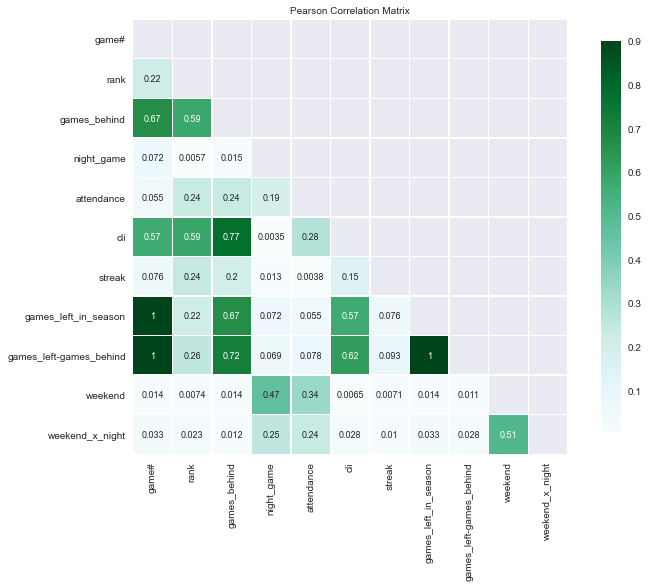

In [35]:
mask = np.zeros_like(nym_home.corr().abs(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(12, 8))
plt.title('Pearson Correlation Matrix',fontsize=10)

sns.heatmap(nym_home.corr().abs(),linewidths=0.25,vmax=0.9,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});
plt.show()

In [36]:
nym_home.head()

,game#,date,opponent,rank,games_behind,night_game,attendance,cli,streak,games_left_in_season,day_of_week,month,games_left-games_behind,weekend,weekend_x_night
0,1,Monday Apr 5 2010,FLA,1,-0.00,0,41245.00,1.08,1,161,Monday,Apr,161.00,0,0
1,2,Wednesday Apr 7 2010,FLA,3,-1.00,1,38863.00,1.14,-1,160,Wednesday,Apr,159.00,0,0
2,3,Thursday Apr 8 2010,FLA,4,-1.00,1,25982.00,1.01,-2,159,Thursday,Apr,158.00,0,0
3,4,Friday Apr 9 2010,WSN,2,-1.00,1,28055.00,0.98,1,158,Friday,Apr,157.00,0,0
4,5,Saturday Apr 10 2010,WSN,4,-2.00,0,33044.00,1.06,-1,157,Saturday,Apr,155.00,1,0


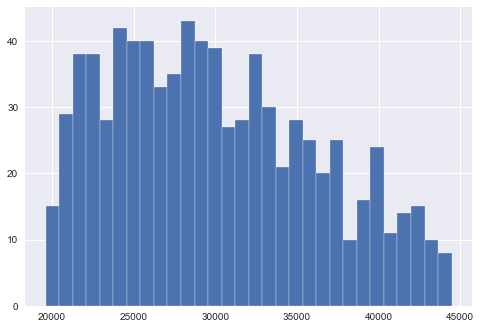

In [37]:
nym_home['attendance'].hist(bins = 30)

In [38]:
nym_home.groupby('night_game')['attendance'].mean().sort_values()

night_game
1   29170.66
0   31637.87
Name: attendance, dtype: float64

In [39]:
nym_home.groupby('day_of_week')['attendance'].mean().sort_values()

day_of_week
Monday      27194.65
Tuesday     27267.28
Wednesday   27719.76
Thursday    28648.44
Friday      31371.31
Sunday      31905.53
Saturday    34160.16
Name: attendance, dtype: float64

In [40]:
nym_home.groupby('month')['attendance'].mean().sort_values()

month
Sep   27453.76
Apr   28827.05
May   29997.57
Aug   30185.18
Jun   31561.03
Jul   31933.12
Oct   35539.17
Mar   40909.67
Name: attendance, dtype: float64

In [41]:
nym_home.groupby('opponent')['attendance'].mean().sort_values()

opponent
TOR   26015.25
BAL   27052.14
MIA   27246.04
TBR   27291.67
CIN   27638.68
ATL   28753.72
ARI   28885.64
SDP   29043.16
MIL   29089.75
SFG   29170.24
COL   29485.32
PIT   29552.82
PHI   29934.13
CHW   30028.80
HOU   30101.17
STL   30112.86
TEX   30311.20
WSN   30642.28
FLA   30889.72
CHC   30999.50
CLE   31049.00
OAK   31344.12
KCR   31418.40
MIN   31709.38
LAD   32778.81
DET   33628.56
LAA   35095.17
BOS   40531.33
NYY   40946.44
Name: attendance, dtype: float64

In [42]:
nym_dummy = pd.get_dummies(nym_home, columns= ['month','day_of_week','opponent'], 
               prefix = {'month': '', 'day_of_week': '', 'opponent': ''}, prefix_sep = '' )

In [43]:
nym_dummy.drop(columns=['date', 'Saturday', 'Sunday', 'game#', 'games_left_in_season'], inplace= True)

In [44]:
# standardize the dataframe except for the target variable
nym_normal = (nym_dummy - nym_dummy.mean())/(nym_dummy.std())

In [45]:
nym_normal['attendance'] = nym_dummy['attendance']  # plug back in non-normalized target

In [46]:
print(nym_normal.shape)
nym_normal.head()

(810, 51)


,rank,games_behind,night_game,attendance,cli,streak,games_left-games_behind,weekend,weekend_x_night,Apr,Aug,Jul,Jun,Mar,May,Oct,Sep,Friday,Monday,Thursday,Tuesday,Wednesday,ARI,ATL,BAL,BOS,CHC,CHW,CIN,CLE,COL,DET,FLA,HOU,KCR,LAA,LAD,MIA,MIL,MIN,NYY,OAK,PHI,PIT,SDP,SFG,STL,TBR,TEX,TOR,WSN
0,-1.88,1.13,-1.41,41245.00,0.73,0.40,1.68,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,2.96,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37
1,-0.04,0.99,0.71,38863.00,0.84,-0.39,1.64,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,-0.37,-0.41,2.36,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37
2,0.89,0.99,0.71,25982.00,0.60,-0.78,1.62,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,2.68,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37
3,-0.96,0.99,0.71,28055.00,0.54,0.40,1.60,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,2.35,-0.34,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,-0.15,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,2.71
4,0.89,0.86,-1.41,33044.00,0.69,-0.39,1.57,1.45,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,-0.15,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,2.71


In [47]:
corr = nym_normal.corr().abs()['attendance']
corr[corr > 0.05].sort_values(ascending = False)

attendance                1.00
weekend                   0.34
NYY                       0.31
cli                       0.28
weekend_x_night           0.24
rank                      0.24
games_behind              0.24
Sep                       0.19
night_game                0.19
Tuesday                   0.18
Wednesday                 0.15
Monday                    0.15
MIA                       0.14
Jul                       0.13
Mar                       0.11
BOS                       0.10
Jun                       0.10
Friday                    0.09
LAD                       0.09
Apr                       0.08
Thursday                  0.08
CIN                       0.08
games_left-games_behind   0.08
Oct                       0.08
ATL                       0.07
LAA                       0.07
DET                       0.06
Name: attendance, dtype: float64

In [48]:
from statsmodels.formula.api import ols

lr_model = ols(formula='attendance~weekend+NYY+cli+rank+MIA+Friday+BOS', 
               data=nym_normal).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             attendance   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     62.86
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           4.95e-72
Time:                        10:42:37   Log-Likelihood:                -8051.8
No. Observations:                 810   AIC:                         1.612e+04
Df Residuals:                     802   BIC:                         1.616e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       3e+04    177.321    169.163      0.000    2.96e+04    3.03e+04
weekend     2391.3464    186.115     12.849      0.000    2026.016    2756.677
NYY         1892.2614    178.107     10.624      0.000    1542.651    2241.872
cli         1299.4826    221.301      5.872      0.000     865.085    1733.880
rank        -768.1428    222.712     -3.449      0.001   -1205.310    -330.975
MIA         -775.6190    178.130     -4.354      0.000   -1125.274    -425.964
Friday      1209.3272    186.015      6.501      0.000     844.194    1574.460
BOS          397.3612    179.456      2.214      0.027      45.103     749.619
==============================================================================
Omnibus:                       21.108   Durbin-Watson:                   1.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.384
Skew:                           0.404   Prob(JB):                     1.38e-05
Kurtosis:                       2.892   Cond. No.                         2.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# save the split datasets into seprate csv files
nym_normal.to_csv('cleaned_mlb.csv', index = False)

## Time-Series

In [24]:
from datetime import datetime, timedelta

In [25]:
time_nym = nym_home.loc[:,['date','attendance']]
print(time_nym.shape)
time_nym.head()

(797, 2)


,date,attendance
0,Monday Apr 5 2010,41245.00
1,Wednesday Apr 7 2010,38863.00
2,Thursday Apr 8 2010,25982.00
3,Friday Apr 9 2010,28055.00
4,Saturday Apr 10 2010,33044.00


In [26]:
# create a dictionary to change month values to appropriate values in order to convert it to DATETIME objects
d = {'Mar':'March','Apr':'April', 'Jun':'June', 'Jul':'July', 
     'Aug':'August', 'Sep':'September', 'Oct': 'October'}

In [27]:
time_nym['date'] = time_nym['date'].replace(d, regex=True)

In [28]:
time_nym.date = pd.to_datetime(time_nym.date, format= '%A %B %d %Y')

In [29]:
time_nym.set_index('date', inplace= True)
time_nym.head()

,attendance
date,
2010-04-05,41245.00
2010-04-07,38863.00
2010-04-08,25982.00
2010-04-09,28055.00
2010-04-10,33044.00


In [36]:
weekly_nym = time_nym.resample('W').mean()

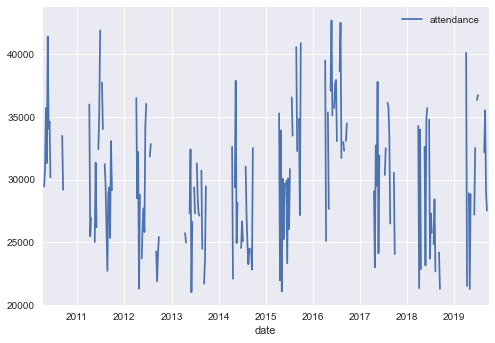

In [37]:
weekly_nym.plot()